# `VelocityProfileDamping`

The following is a test problem presented in [Berlok et al. (2020)](https://ui.adsabs.harvard.edu/abs/2020MNRAS.491.2919B/abstract). It tests the damping of a simple sine wave velocity profile:

${\bf v}({\bf r}) = A\sin({\bf k}\cdot{\bf r}){\hat {\bf k}}$

where ${\bf v}({\bf r})$ is the velocity, $A$ is the amplitude of the perturbation (parameter `VPD_v0`), ${\bf r}$ is a position vector, and ${\bf k}$ is a wavevector, which we set to ${\bf k} = 2\pi/L{\hat {\bf k}}$, where $L$ is the length of the domain on a side and ${\hat {\bf k}}$ can be chosen by setting the parameter `VPD_Dir`. 

${\bf v}({\bf r}, t) = A\sin({\bf k}\cdot{\bf r})e^{-\Gamma{t}}{\hat {\bf k}}$

$\Gamma = \frac{4\nu_\parallel}{3}k^2$

Originally, the internal energy is constant with position along ${\bf r}$, with value $U_0 = \frac{P_0}{(\gamma-1)\rho_0}$ (with $P_0$ given by `VPD_P0` and $\rho_0$ given by `VPD_Rho0`). But as the velocity perturbation is damped, the kinetic energy is dissipated into heat. 

$U({\bf r}, t) = U_0 + \frac{\rho{A^2}}{2}\cos^2({\bf k}\cdot{\bf r})[1-e^{-2\Gamma{t}}]$

In [1]:
import yt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ts = yt.DatasetSeries("Data*")

yt : [WARNING  ] 2025-11-04 10:43:40,655 Cannot determine code units ==> Use units_override to specify the units
yt : [WARNING  ] 2025-11-04 10:43:40,655 Assuming   length unit = 1.000000 cm
yt : [WARNING  ] 2025-11-04 10:43:40,656 Assuming     time unit = 1.000000 s
yt : [WARNING  ] 2025-11-04 10:43:40,656 Assuming     mass unit = 1.000000 g
yt : [WARNING  ] 2025-11-04 10:43:40,656 Assuming magnetic unit = 3.544908 gauss
yt : [INFO     ] 2025-11-04 10:43:40,680 Parameters: current_time              = 0.0
yt : [INFO     ] 2025-11-04 10:43:40,681 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2025-11-04 10:43:40,681 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-11-04 10:43:40,681 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2025-11-04 10:43:40,682 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2025-11-04 10:43:41,394 Cannot determine code units ==> Use units_override to specify the units
yt : [WARNING  ] 

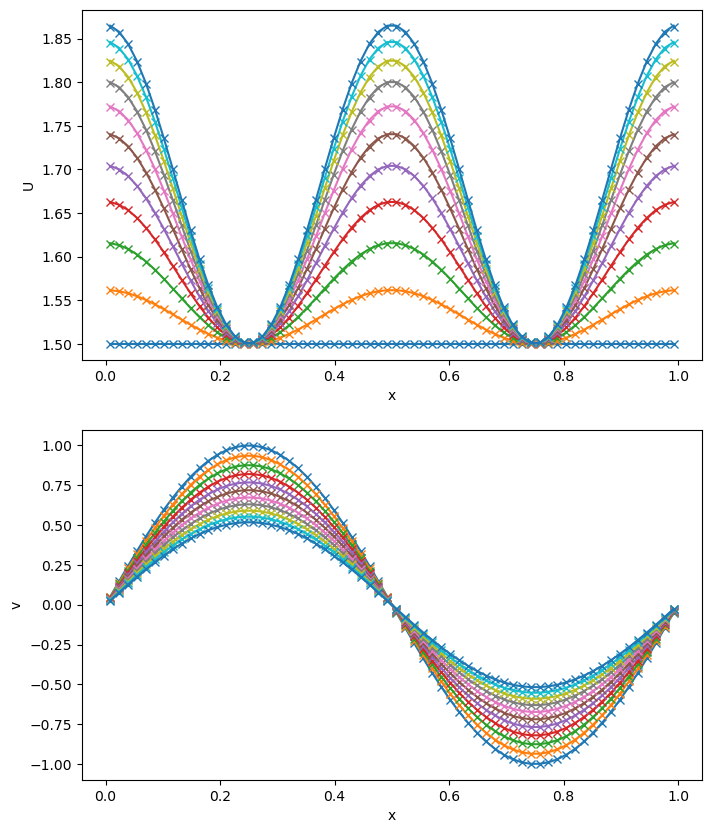

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))
for i, ds in enumerate(ts):
    v0 = ds.parameters["VPD_v0"]
    u0 = ds.parameters["VPD_P0"]/(ds.gamma-1.0)
    rho0 = ds.parameters["VPD_Rho0"]
    nu = ds.parameters["Visc_ConstCoeff"]
    vaxis = ds.parameters["VPD_Dir"]
    baxis = ds.parameters["VPD_BDir"]
    L = ds.parameters["BoxSize"][0]
    if vaxis == 3:
        lam = L/np.sqrt(3.0)
        ray = ds.ray(ds.domain_left_edge, ds.domain_right_edge)
        x = (ray["x"].v + ray["y"].v + ray["z"].v)/np.sqrt(3.0)
        vel = (ray["velocity_x"].v + ray["velocity_y"].v + ray["velocity_z"].v)/np.sqrt(3.0)
        gam_fac = 4.0
    else:
        if baxis == vaxis:
            gam_fac = 4.0
        else:
            gam_fac = 1.0
        lam = L
        ray = ds.ortho_ray(vaxis, (0.5*L, 0.5*L))
        x = ray["xyz"[vaxis]].v
        vel = ray["velocity_{}".format("xyz"[vaxis])].v
    k = 2.0*np.pi/lam
    if ds.parameters["Visc_FluxType"] == 1:
        gam_fac = 4.0
    gamma = gam_fac*nu*k*k/3.0
    v = v0*np.sin(k*x)*np.exp(-gamma*ds.current_time.v)
    U = u0 + 0.5*v0*v0*np.cos(k*x)**2*(1.0-np.exp(-2.0*gamma*ds.current_time.v))
    ax1.plot(x, ray["specific_thermal_energy"], 'x', color=f"C{i}")
    ax1.plot(x, U, color=f"C{i}")
    ax2.plot(x, vel, 'x', color=f"C{i}")
    ax2.plot(x, v, color=f"C{i}")
ax1.set_ylabel("U")
ax2.set_ylabel("v")
for ax in (ax1, ax2):
    ax.set_xlabel("x")

yt : [INFO     ] 2025-11-04 10:43:48,125 xlim = 0.000000 1.000000
yt : [INFO     ] 2025-11-04 10:43:48,126 ylim = 0.000000 1.000000
yt : [INFO     ] 2025-11-04 10:43:48,127 xlim = 0.000000 1.000000
yt : [INFO     ] 2025-11-04 10:43:48,127 ylim = 0.000000 1.000000
yt : [INFO     ] 2025-11-04 10:43:48,135 Making a fixed resolution buffer of (('gas', 'velocity_x')) 800 by 800
yt : [INFO     ] 2025-11-04 10:43:48,267 Making a fixed resolution buffer of (('gas', 'magnetic_field_z')) 800 by 800



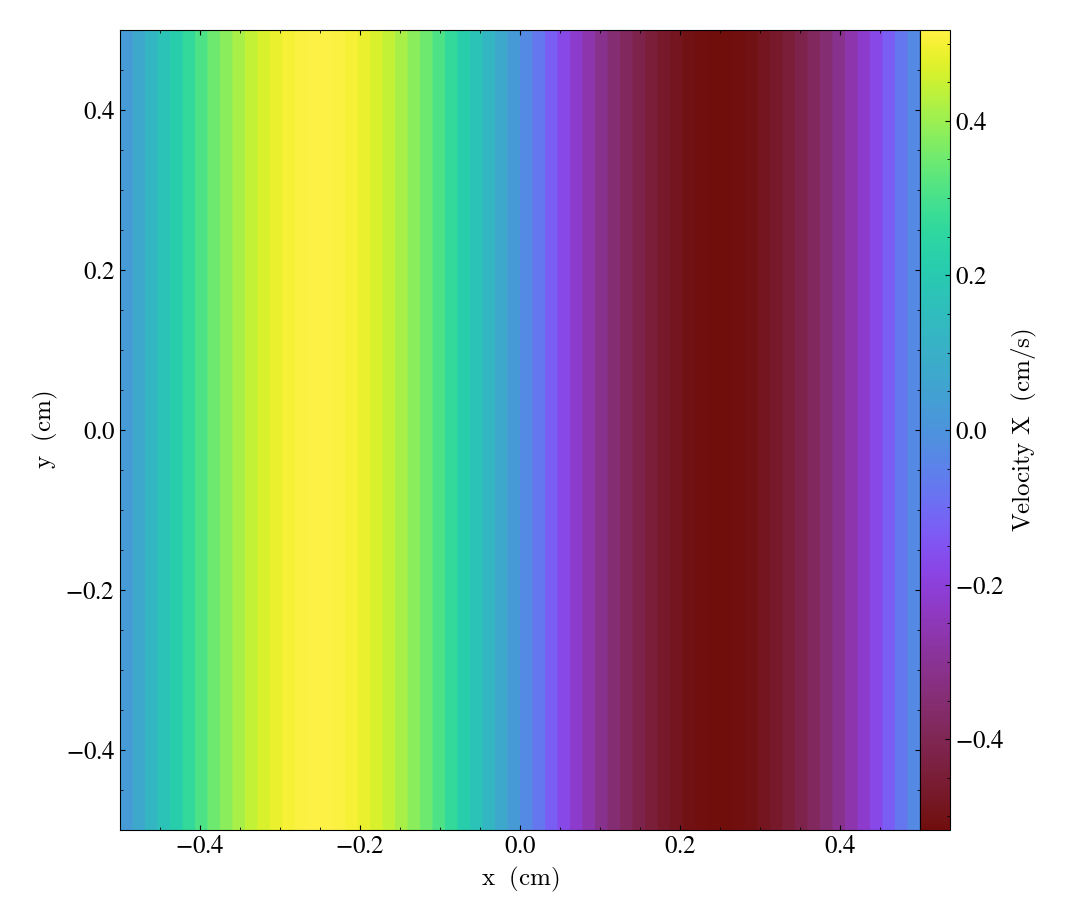
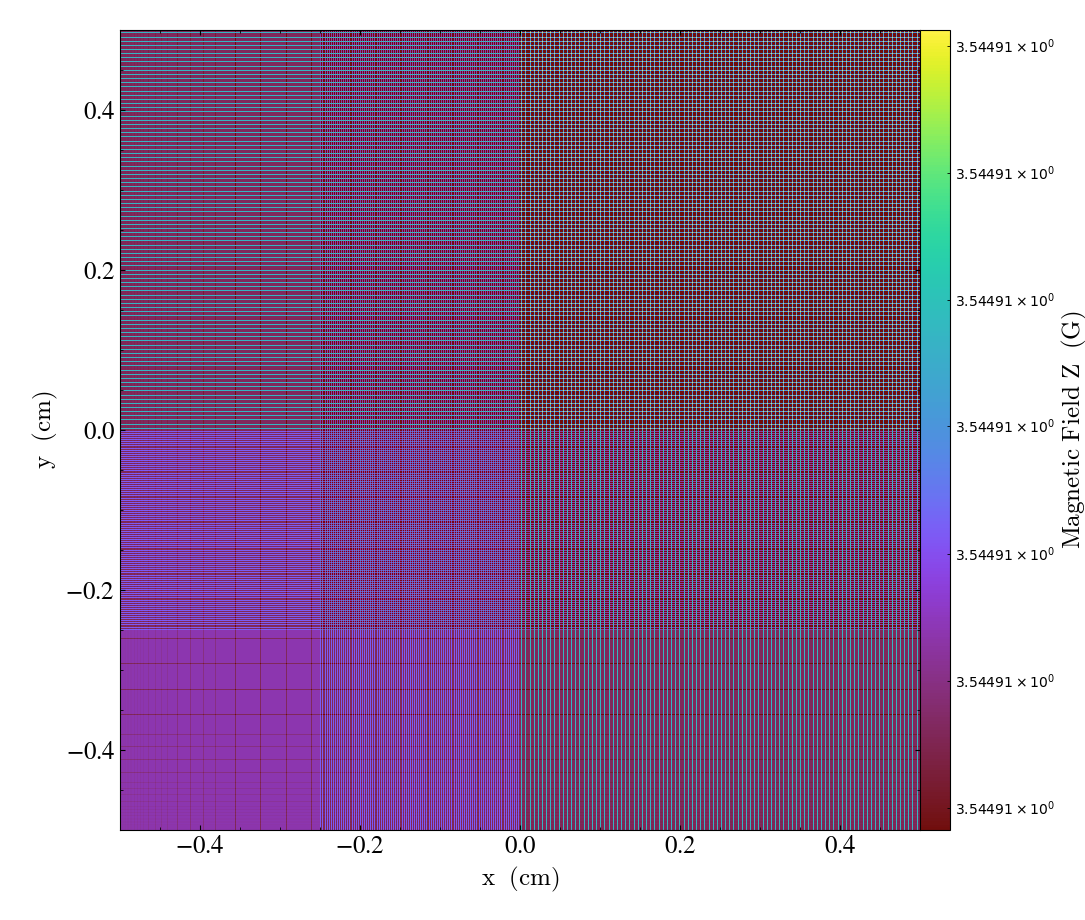

In [4]:
slc = yt.SlicePlot(ds, 'z', ["velocity_x", 'magnetic_field_z'])
slc.show()